# **Heart Disease Predictor Model I**

Alba Puig Font, NIU:1636034

Cardiovascular diseases or heart disease are the number one cause of death globally. Heart disease are concertedly contributed by hypertension, diabetes, overweight and unhealthy lifestyles. You can read more on the heart disease statistics and causes for self-understanding. This project covers manual exploratory data analysis and model analysis. The dataset used in this project is UCI Heart Disease dataset, and both data and code for this project are available on my GitHub repository.

With the intention of maximizing the potential of this predictive tool, the study has been analyzed at two levels. A first model (model I) of binary type, which classifies between classes 0 and 1, where 0 corresponds to a healthy person and 1 to a person with heart disease. The second model (model II) is a multiclass model that classifies between classes 0, 1, 2, 3, and 4 corresponding to different levels of disease.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

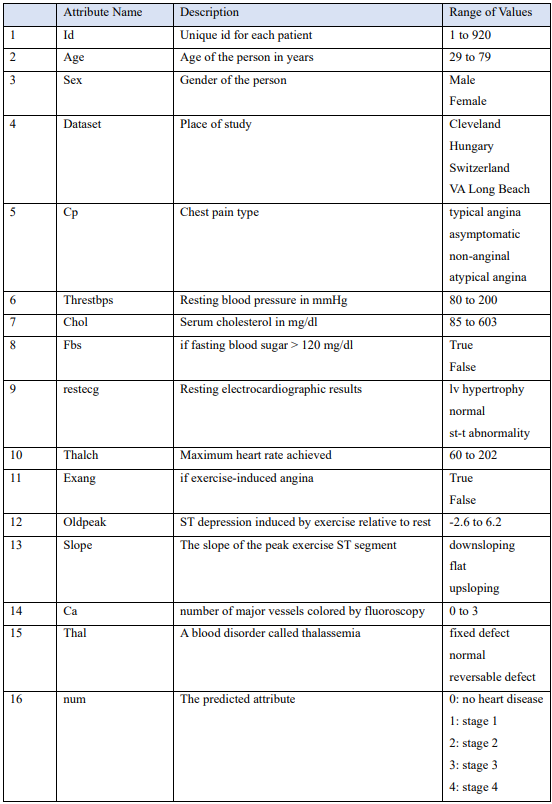

In order to familiarize myself with the subject matter, I looked for how heart diseases are diagnosed and I looked for some of the terms mentioned above.

The diagnosis of heart diseases is done through a combination of clinical signs and test results. The types of tests that will be carried out will be chosen according to what the doctor considers to be happening, from electrocardiograms and computerized cardiac tomography (CT) to blood tests and physical effort tests.

The main risk factors for suffering a cardiovascular disease are: high cholesterol, high blood pressure, diabetes, weight, family history and smoking. It should be noted that talasemia, one of the variables of this data set, is hereditary.

First of all, we remove the Id column as it is a unique value and identify each patient. This will make it easier for us to do the CardEncoder later on and not obtain the wrong values in the metrics.

In [3]:
df.drop(columns="id", inplace= True)

In [4]:
target = 'num'
attributes = [k for k in df.keys() if k!=target]

X = df[attributes]
y = (df[target]>0)*1

# 1. Exploratory Data Analysis (EDA)

Once a data set has been acquired, it is important to carry out an initial exploration of the data to obtain a vision of its distribution, scope and any atypical value. Doing this helps to identify any potential problems with data and guides decisions on data cleaning and preprocessing.

In [5]:
X.shape

(920, 14)

The dataset is comprised of 920 columns, encompassing 14 variables.

In [6]:
# Name of the columns
X.columns

Index(['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [7]:
# Check the data types
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 100.8+ KB


In [8]:
# Summary of descriptive statistics such as mean, standard deviation, minimum, maximum, etc., for all numeric columns in the DataFrame.
d = X.describe()
d

,age,trestbps,chol,thalch,oldpeak,ca
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000


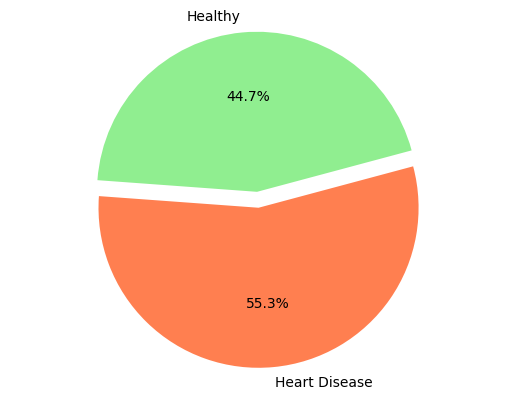

In [9]:
count_healthy = y.value_counts()[0]
count_disease = y.value_counts()[1]

my_labels = 'Healthy','Heart Disease'
my_colors = ['#c2c2f0','#ff6666']
plt.pie([count_healthy, count_disease], labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = False, colors=['lightgreen','coral'], explode=(0.1, 0))
plt.axis('equal')
plt.show()

Num (y) variable is our dependent variable, indicating whether the pacient has heart disease (1) or not (0).

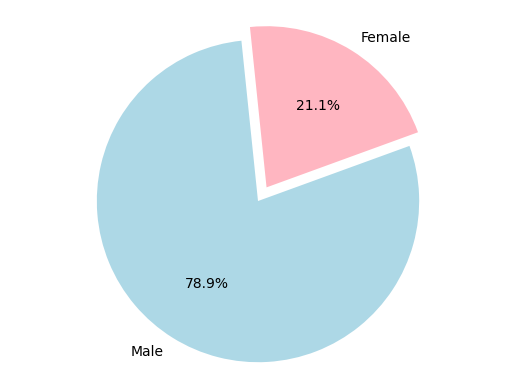

In [10]:
df_sex = X.groupby("sex").size()

my_labels = 'Female','Male'
my_colors = ['lightpink','lightblue']
plt.pie(df_sex.values, labels=my_labels, autopct='%1.1f%%', startangle=20, shadow = False, colors=my_colors, explode=(0.1, 0))
plt.axis('equal')
plt.show()

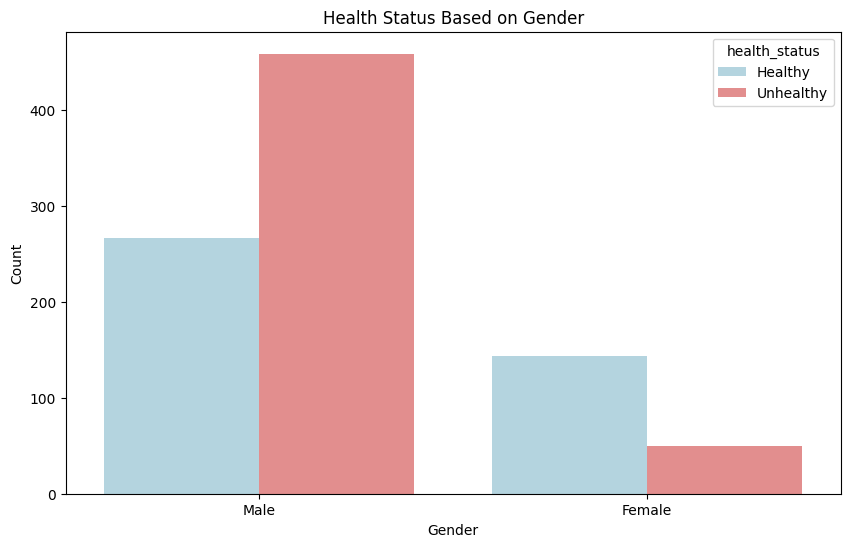

In [11]:
df['health_status'] = df['num'].apply(lambda x: 'Healthy' if x == 0 else 'Unhealthy')

# Create a bar plot for healthy and unhealthy individuals based on gender
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='health_status', data=df, palette=['lightblue', 'lightcoral'])
plt.title('Health Status Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The plot shows that there are more unhealthy men than women, and more healthy women than men. Generally, there are more men than women in the dataset.

<ipython-input-12-ed24796e8f7b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


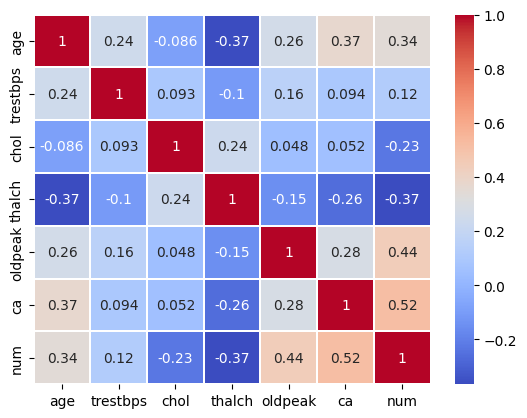

In [12]:
corr=df.corr()

sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

Correlation analysis is a statistical evaluation method used to study the strength of a relationship between two numeric variables.
There is no single feature that has a very high correlation with our target value. Also, some of the features have a negative correlation with the target value and some have positive.


Let's look at the imbalance in the data:

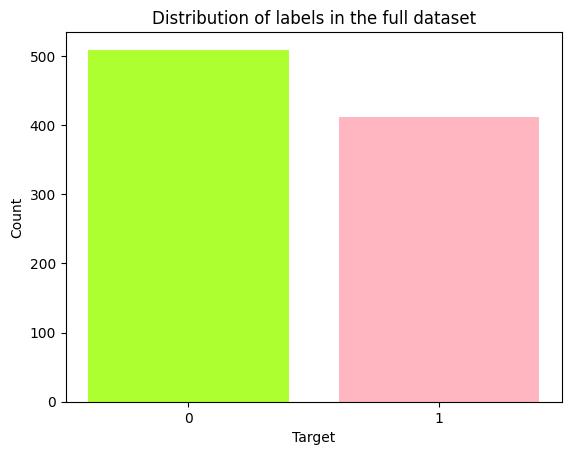

In [13]:
# Crear un gràfic de barres amb la distribució de les etiquetes
plt.bar(['0', '1'], y.value_counts(), color=['greenyellow', 'lightpink'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of labels in the full dataset')
plt.show()

Separate between the training set and the test set:

In [14]:
from sklearn.model_selection import train_test_split

# Separate data into training and testing sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# Count the number of unique values in training and testing sets
print('Train labels:', y_train.value_counts())
print('Test labels:', y_test.value_counts())

# Calculate the percentage of each value in the training and test
print('Train percentage:', y_train.value_counts(normalize=True)*100)
print('Test percentage:', y_test.value_counts(normalize=True)*100)

Train labels: 1    407
0    329
Name: num, dtype: int64
Test labels: 1    102
0     82
Name: num, dtype: int64
Train percentage: 1    55.298913
0    44.701087
Name: num, dtype: float64
Test percentage: 1    55.434783
0    44.565217
Name: num, dtype: float64


We can see that the distribution of the train and the test is the same, since they have the same percentage of values 0 and 1. This is what is expected when using stratification, which is a technique to preserve the proportion of classes in subsets of data.




#2. Data preprocessing

Data cleaning is a fundamental step in any machine learning project, as it ensures that data is accurate and reliable for modeling and analysis. When it comes to predicting cardiac diseases, data cleaning involves detecting and correcting any error or inconsistency in the data set that could affect the accuracy of its predictive model.

In [16]:
# Check for null values
def has_nans(df):
    return df.isna().sum().sum()>0

# Print if there are null values in the training set
print(has_nans(X_train))

True


In [17]:
# Displays the number of null values (NaN) for each column.
X_train.isna().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     50
chol         27
fbs          68
restecg       0
thalch       47
exang        47
oldpeak      52
slope       241
ca          485
thal        381
dtype: int64

Once we know that our dataset contains NaNs, we can examine them from the perspective of columns or rows.

Regarding rows, we can determine the percentage of information in each row that contains NaNs.

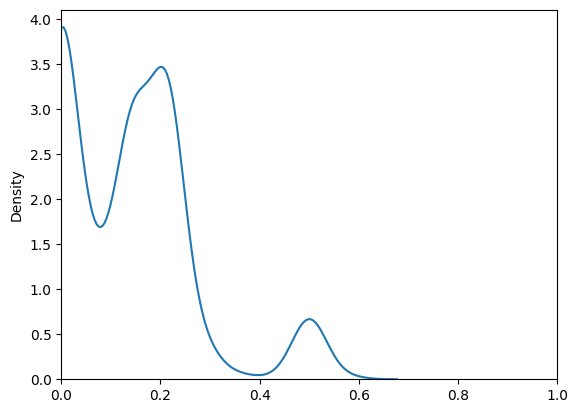

In [18]:
percent_nan_fila = X_train.isna().mean(axis = 1)
percent_nan_fila
sns.kdeplot(percent_nan_fila)
plt.xlim(0,1)
plt.show()

The KDE graph shows two main concentrations of missing values in the data: one around 20% and the other around 60%. This indicates the need to address rows with missing values before further analysis.

Now, graphically represent how the percentages of null values are distributed across the rows of the dataset:

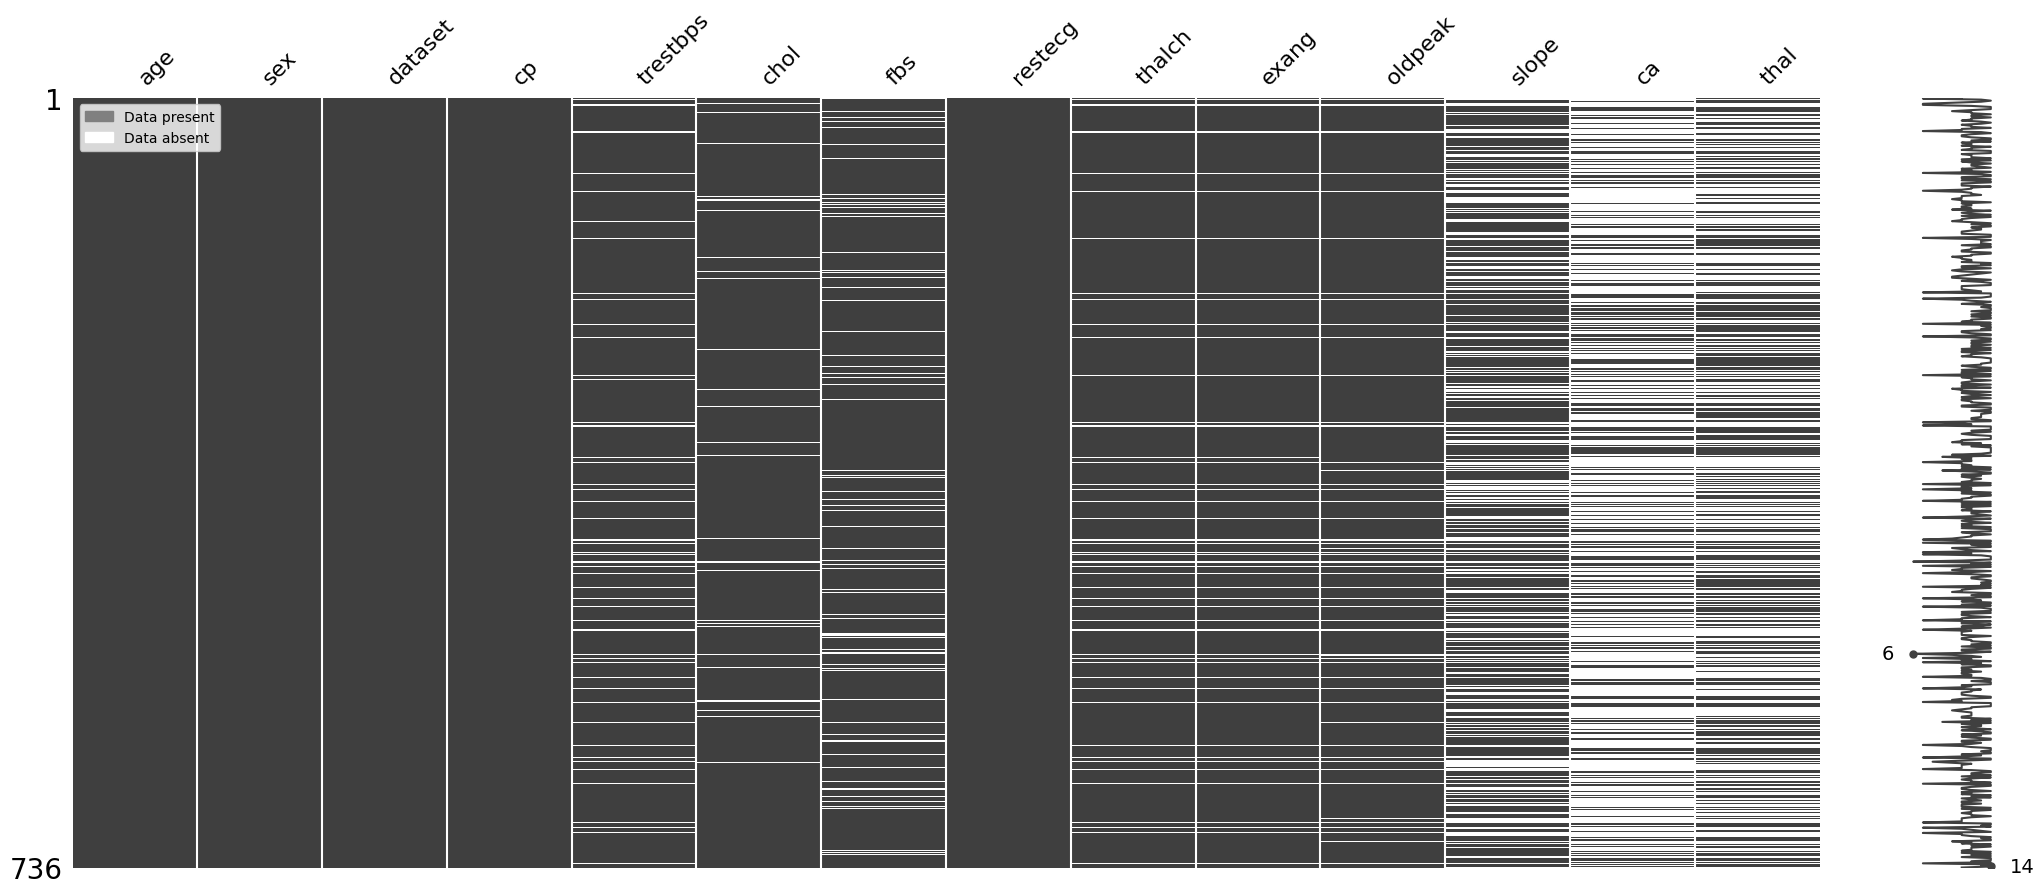

In [19]:
import missingno as msno # To visualize missing value
import matplotlib.patches as mpatches

msno.matrix(X_train)
gray_patch = mpatches.Patch(color='gray', label='Data present')
white_patch = mpatches.Patch(color='white', label='Data absent ')
plt.legend(loc= "upper left", handles=[gray_patch, white_patch])

Missing values are represented with horizontal lines. This library provides an informative way to visualize the missing values in each column and to see if there is any correlation between the missing values in different columns.

From the perspective of columns:




In [20]:
def get_percentage_nan_per_column(df):
  # Returns a DataFrame with the percentage of NaNs for each column
  return df.isna().sum().sort_values()/len(df)*100.

percentage_nan = get_percentage_nan_per_column(X_train)
percentage_nan
# Columns with a high percentage of NaNs need to be removed.

def print_percentage_nan(percentage_nan):
  # Prints the information on the percentage of NaNs for each column
  for col, percentage in percentage_nan.to_dict().items():
    print(col, percentage)
print_percentage_nan(percentage_nan)

age 0.0
sex 0.0
dataset 0.0
cp 0.0
restecg 0.0
chol 3.6684782608695654
thalch 6.385869565217392
exang 6.385869565217392
trestbps 6.7934782608695645
oldpeak 7.065217391304348
fbs 9.239130434782608
slope 32.744565217391305
thal 51.766304347826086
ca 65.89673913043478


Analyze the columns with a low percentage of NaNs. First, it's essential to look at the distribution of NaNs, i.e., how they are distributed throughout the data.

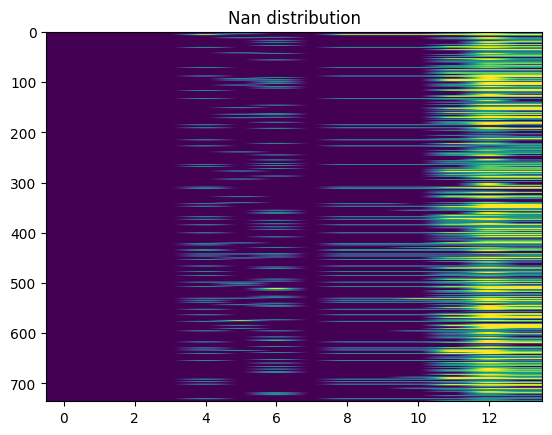

Using 9 cols


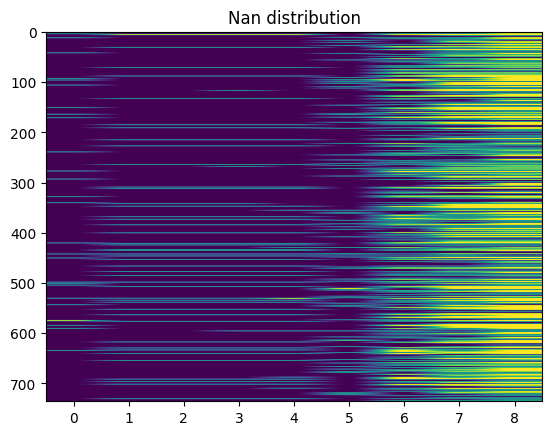

In [21]:
def get_cols_with_na(df):
  isna = df.isna().sum().sort_values()
  isna = isna[isna>0]
  cols = isna.index
  return cols

def filter_df_just_na(df):
  cols = get_cols_with_na(df)
  print (f'Using {len(cols)} cols')
  return df[cols]

def plot_nan_distribution(df,just_na_cols = False):
  if just_na_cols:
    df = filter_df_just_na(df)
  plt.imshow(df.isna(),aspect = 'auto')
  plt.title('Nan distribution')
  plt.show()

plot_nan_distribution(X_train)
plot_nan_distribution(X_train,just_na_cols = True)

The resulting graph is a heat map where the yellow lines represent missing values, and the blue lines represent non-missing values. The x-axis represents the columns of the dataframe, and the y-axis represents the rows. Therefore, we can observe that most NaNs are concentrated in one or two columns.

Now, carry out NaN processing and encoding procedures on the X_train and X_test datasets.

To accomplish this, we design a pipeline, a sequence of data transformations. It first encodes categorical columns using a TargetEncoder, then scales all features to have a mean of 0 and a standard deviation of 1 with a StandardScaler, and finally imputes any missing values using a KNNImputer. This pipeline can be consistently applied to any dataset.

In [22]:
! pip install category-encoders
import category_encoders
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

# Define a pipeline

# Create an instance of the TargetEncoder class and specify the columns to transform
encoder = TargetEncoder(cols=['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], min_samples_leaf=5)

scaler = StandardScaler()

imp = KNNImputer()

pipe = Pipeline(steps=[ ("encoder", encoder), ("scaler", scaler), ("imputer", imp)])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 932.2 kB/s eta 0:00:00


In [23]:
# Apply the pipeline to X_train
X_train_transformed = pipe.fit_transform(X_train, y_train)

In [24]:
# Apply the pipeline to X_test
X_test_transformed = pipe.transform(X_test)

In [25]:
# Check again if the dataset has NaN values
def has_nans(np_array):
    return np.isnan(np_array).sum() > 0

print("NaN values:", has_nans(X_train_transformed))

NaN values: False


# Model Selection

The main goal of the project is to predict the occurrence of heart diseases with maximum accuracy. To achieve this, we will try diferent classification algorithms.

The metric we will use to evaluate the performance of the algorithms will be the maximum precision when the recall is greater than 0.95.


In [26]:
from sklearn.metrics import precision_recall_curve

# Define a custom function that calculates maximum precision when recall is greater than 0.95
def max_precision_95(y_true, y_pred):

  precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

  th = recall > 0.95

  precisions_95 = precision[th]

  # Calculate the maximum precision within this subset
  max_precision_95 = max(precisions_95)

  # Return the value of maximum precision and the threshold value
  return max_precision_95


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score
import time

# Dictionary to store predictions and time
preds = {'train':{}, 'test':{}, 'time':{}}

results = {}

# Custom scorer for grid search
scorer = make_scorer(max_precision_95, needs_proba=True, greater_is_better=True)

# Logistic Regression
start_time = time.time()
lr_model = LogisticRegression()
lr_params = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}
lr_grid_search = GridSearchCV(lr_model, lr_params, scoring=scorer, cv= StratifiedKFold(n_splits=10))
lr_grid_search.fit(X_train_transformed, y_train)
results['LogisticRegression'] = lr_grid_search.best_score_
preds['train']['LogisticRegression'] = lr_grid_search.predict(X_train_transformed)
preds['test']['LogisticRegression'] = lr_grid_search.predict(X_test_transformed)
preds['time']['LogisticRegression'] = time.time() - start_time


# RandomForest
start_time = time.time()
rf_model = RandomForestClassifier()
rf_params = {'max_depth': [9, 11, 15], 'n_estimators': [100, 200, 500]}
rf_grid_search = GridSearchCV(rf_model, rf_params, scoring=scorer, cv= StratifiedKFold(n_splits=5))
rf_grid_search.fit(X_train_transformed, y_train)
results['RandomForest'] = rf_grid_search.best_score_
preds['train']['RandomForest'] = rf_grid_search.predict(X_train_transformed)
preds['test']['RandomForest'] = rf_grid_search.predict(X_test_transformed)
preds['time']['RandomForest'] = time.time() - start_time

# XGBoost
start_time = time.time()
xgb_model = XGBClassifier()
xgb_params = {'max_depth': [3, 4, 5], 'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200]}
xgb_grid_search = GridSearchCV(xgb_model, xgb_params, scoring=scorer, cv= StratifiedKFold(n_splits=10))
xgb_grid_search.fit(X_train_transformed, y_train)
results['XGBoost'] = xgb_grid_search.best_score_
preds['train']['XGBoost'] = xgb_grid_search.predict(X_train_transformed)
preds['test']['XGBoost'] = xgb_grid_search.predict(X_test_transformed)
preds['time']['XGBoost'] = time.time() - start_time

# Get the best hyperparameters after tuning
best_params_lr = lr_grid_search.best_params_
best_params_rf = rf_grid_search.best_params_
best_params_xgb = xgb_grid_search.best_params_

print(f"Best hyperparameters for LogisticRegression: {best_params_lr}")
print(f"Best hyperparameters for RandomForest: {best_params_rf}")
print(f"Best hyperparameters for XGBoost: {best_params_xgb}")
print("\n")

# Display results
print(f"Metric results for each model: {results}")
print(f"Execution time for each model: {preds['time']}")
best_model = max(results, key=results.get)
print(f"The best model according to the chosen metric is: {best_model} with a score of {results[best_model]}")

Best hyperparameters for LogisticRegression: {'C': 10, 'penalty': 'l2'}
Best hyperparameters for RandomForest: {'max_depth': 9, 'n_estimators': 500}
Best hyperparameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}


Metric results for each model: {'LogisticRegression': 0.7670243416515542, 'RandomForest': 0.7473650159364446, 'XGBoost': 0.738896587305525}
Execution time for each model: {'LogisticRegression': 0.3912501335144043, 'RandomForest': 30.97461462020874, 'XGBoost': 12.633542537689209}
The best model according to the chosen metric is: LogisticRegression with a score of 0.7670243416515542


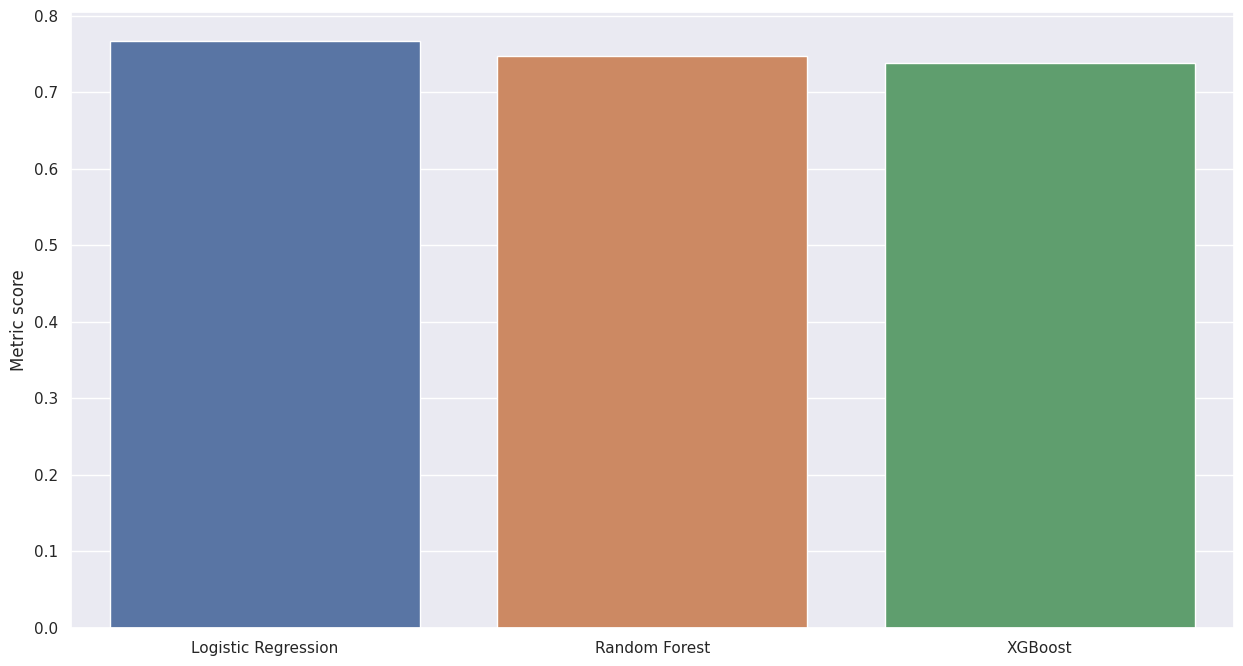

In [28]:
scores = [results['LogisticRegression'],results['RandomForest'],results['XGBoost']]
algorithms = ["Logistic Regression","Random Forest","XGBoost"]
sns.set(rc={'figure.figsize':(15,8)})
plt.ylabel("Metric score")

sns.barplot(x=algorithms, y=scores)
plt.show()

The bar plot compares the metric scores of three algorithms. Although all three algorithms perform well, Logistic Regression has a slightly higher metric score, followed by Random Forest, and XGBoost has the lowest score. This suggests that, for this specific dataset and the chosen metric, Logistic Regression is performing better than the other two algorithms.

#  Model Evaluation

In [29]:
# Import the sklearn.metrics library for the precision_recall_curve
from sklearn.metrics import precision_recall_curve, auc

def plot_analysis_results(X, y, y_prob, y_pred):

    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # PR Curve
    precision, recall, thresholds = precision_recall_curve(y, y_prob[:, 1])
    auc_pr = auc(recall, precision)
    axes[0].plot(recall, precision, label=f'AUC = {auc_pr:.2f}')
    axes[0].set_xlabel('Recall')
    axes[0].set_ylabel('Precision')
    axes[0].set_title('PR Curve')
    axes[0].legend()

    # Prediction vs. Probability plot for Class 1
    scatter = axes[1].scatter(y_prob[:, 1], y_pred, c=y, cmap='viridis')
    axes[1].set_xlabel('Probability 1')
    axes[1].set_ylabel('Prediction')
    axes[1].set_title('Prediction vs. Probability 1')

    # Add a color bar to represent the true labels
    cbar = plt.colorbar(scatter, ax=axes[1])
    cbar.set_label('True Label')

    # Show the plots
    plt.tight_layout()
    plt.show()

    return precision, recall, thresholds


Then calculate the classification threshold. This threshold would help us decide the class of an observation based on the predicted probability. For example, in our binary classification problem, if the predicted probability is higher than the threshold, the observation is classified as 1, and if it is lower, it is classified as 0. In this case, the threshold is selected to maximize precision while maintaining a recall of at least 0.95. This is useful since we are interested in having a high recall, but we also want to maximize the precision.

In [30]:
def max_threshold_95(y_true, y_pred):

    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

    # Select thresholds where recall is greater than 0.95
    th = recall > 0.95
    precisions_95 = precision[th]

    # Calculate the maximum precision within this subset
    max_precision_95 = max(precisions_95)

    # Get the index of the maximum precision value
    max_index = np.argmax(precisions_95)

    # Get the corresponding threshold value
    max_threshold_95 = thresholds[th[:-1]][max_index]

    # Return the maximum precision value and the corresponding threshold value
    return max_precision_95, max_threshold_95

In [31]:
# Calculate class probability for test set predictions
y_prob_lr = lr_grid_search.predict_proba(X_test_transformed)

y_pred_lr = lr_grid_search.predict(X_test_transformed)

max_precision_lr, max_threshold_lr = max_threshold_95(y_test,y_prob_lr[:,1])

# Display the maximum precision when recall is greater than 0.95
print("Maximum precision when recall is greater than 0.95:", max_precision_lr)
print(f"Corresponding threshold: {max_threshold_lr:.2f}")

Maximum precision when recall is greater than 0.95: 0.7886178861788617
Corresponding threshold: 0.31


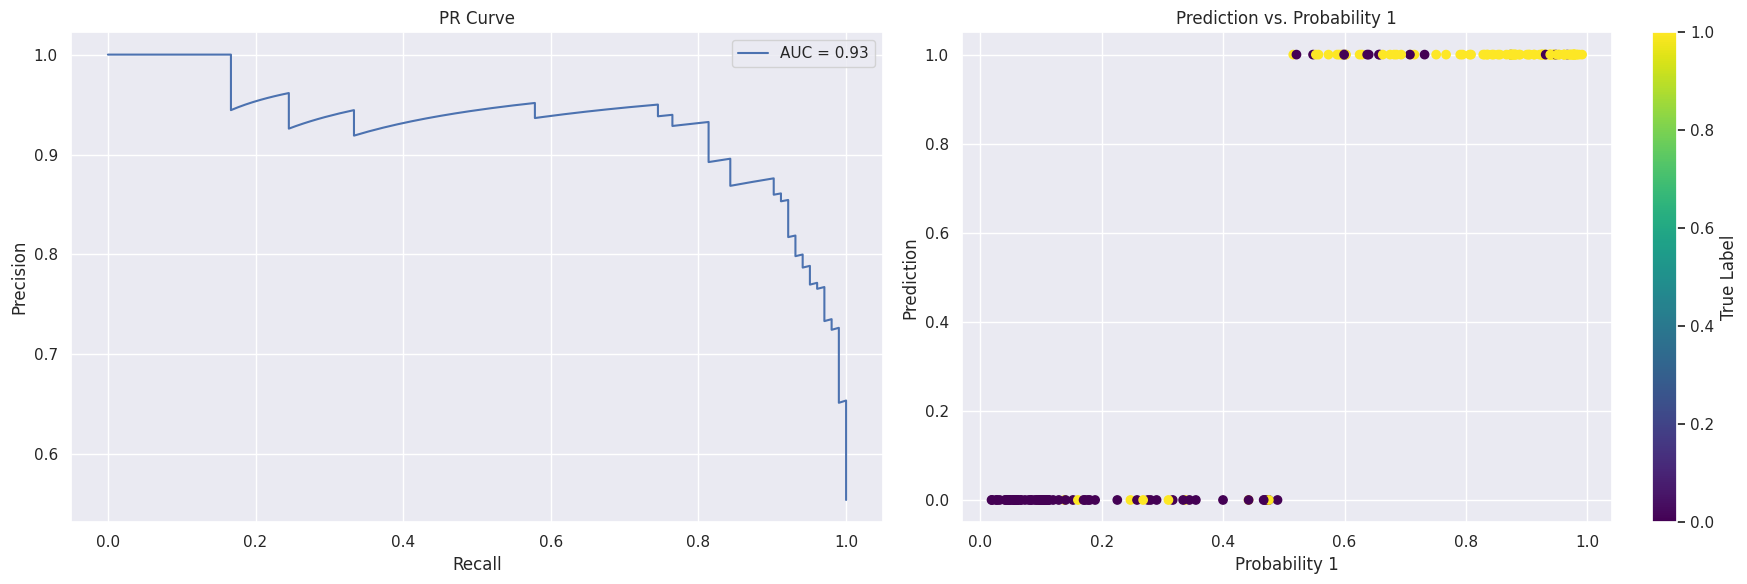

In [32]:
precision_lr, recall_lr, thresholds = plot_analysis_results(X_test_transformed, y_test, y_prob_lr, y_pred_lr)

**Precision-Recall Curve (PR Curve):**
- The PR Curve focuses on the relationship between Precision and Recall in classification. Precision is the ratio of true positives to instances classified as positive, while Recall measures the ratio of true positives that have been correctly identified by the model.

- In our case, we are using a logistic regression model to predict a binary response variable. The PR curve is generated from the model's predicted probabilities for each observation in the test set.

- The PR curve of our model has an AUC (area under the curve) of 0.93. This indicates that the model performs well, as an AUC of 1 would be perfect.

**Prediction vs. Probability 1:**

- The plot shows the relationship between a model's predictions and the probabilities associated with those predictions. The vertical axis ("Prediction") represents the actual predictions of the model, while the horizontal axis ("Probability 1") displays the probability associated with that prediction.

- Points concentrated near "Prediction" = 1 and "Probability 1" = 1 indicate predictions that the model has made with high confidence and are correct. Conversely, points close to "Prediction" = 0 and "Probability 1" = 0 also indicate low-confidence but correct predictions. Scattered points may indicate errors or uncertainties in the prediction.


**CONFUSION MATRIX**

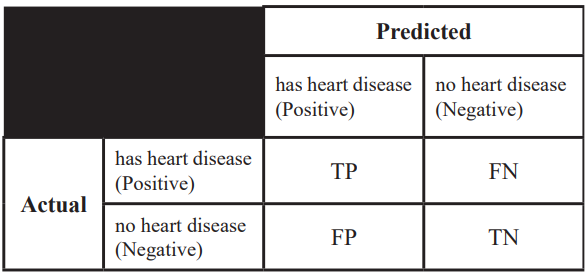




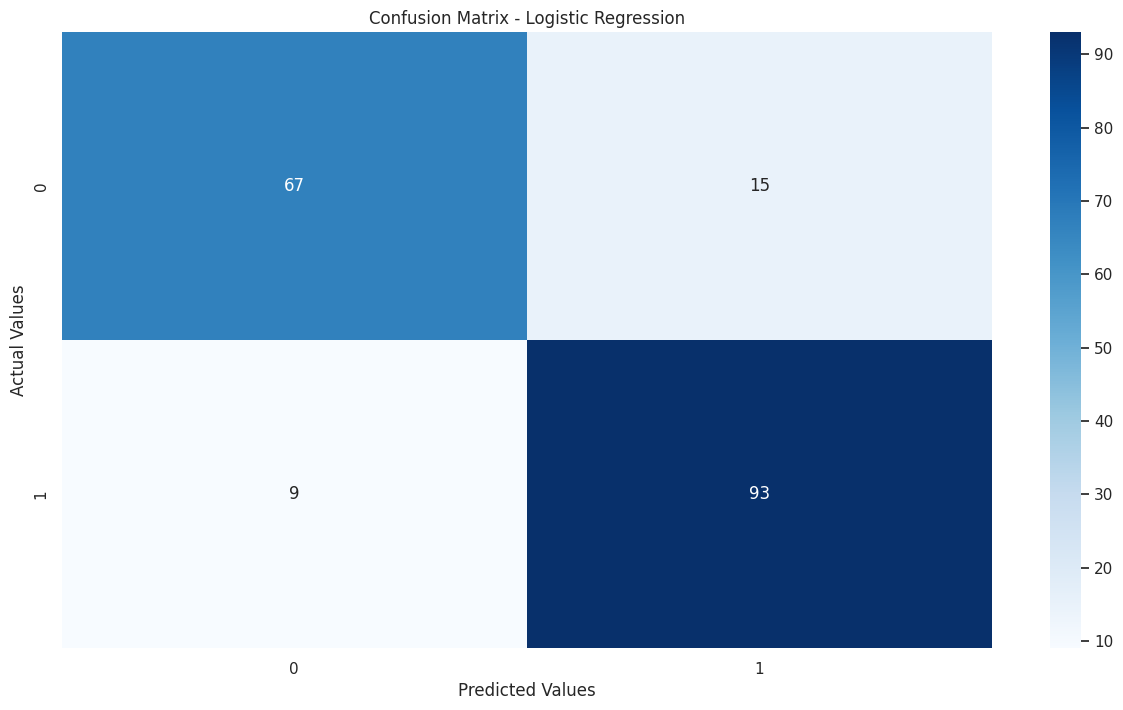

In [33]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

best_model = lr_grid_search.best_estimator_
y_pred = best_model.predict(X_test_transformed)

conf_matrix_lr = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix_lr, annot=True, fmt=".0f",cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

- 67 true negatives (TN): The model correctly predicted that 67 instances were of class 0.

- 15 false positives (FP): The model incorrectly predicted that 15 instances were of class 1 when they were actually of class 0.

- 9 false negatives (FN): The model incorrectly predicted that 9 instances were of class 0 when they were actually of class 1.

- 93 true positives (TP): The model correctly predicted that 93 instances were of class 1.


**CLASSIFICATION REPORT**

In [34]:
from sklearn.metrics import classification_report

report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        82
           1       0.86      0.91      0.89       102

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184



Class 0:

- Precision: 0.88. This means that 88% of the model's predictions for class 0 are correct.
- Recall: 0.82. This means that the model correctly identified 82% of class 0 instances in the test set.
- F1-Score: 0.85. This is the harmonic mean of precision and recall, providing a single measure of model quality.

Class 1:

- Precision: 0.86. This means that 86% of the model's predictions for class 1 are correct.
- Recall: 0.91. This means that the model correctly identified 91% of class 1 instances in the test set.
- F1-Score: 0.89. This is the harmonic mean of precision and recall, providing a single measure of model quality.

The model's accuracy is 0.87, meaning that 87% of all predictions made by the model are correct.
In summary, the model appears to perform well, with precision, recall, and F1-Score around 87%.


In [35]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model using the true labels and predictions on the test set
lr_score_train = accuracy_score(y_train, lr_grid_search.predict(X_train_transformed))
lr_score_test = accuracy_score(y_test, lr_grid_search.predict(X_test_transformed))

# Print the accuracy
print(f"The accuracy of the Logistic Regression model on the train set is: {lr_score_train:.2f}")
print(f"The accuracy of the Logistic Regression model on the test set is: {lr_score_test:.2f}")

The accuracy of the Logistic Regression model on the train set is: 0.83
The accuracy of the Logistic Regression model on the test set is: 0.87


In predicting the presence of cardiovascular diseases, an accuracy of 83% has been achieved on the training set and an accuracy of 87% on the test set, indicating that our model is not overfitting the data.


**MODEL EXPLAINABILITY**

Model explainability is crucial for understanding its internal workings and knowing which features contribute most to predictions. A common tool for model explainability is SHAP (SHapley Additive exPlanations), which provides a unified measure of feature importance.


Let's see what the SHAP values tell us. These work by showing the influence of the values of every variable in a single row, compared to their baseline values

In [36]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 3.1 MB/s eta 0:00:00


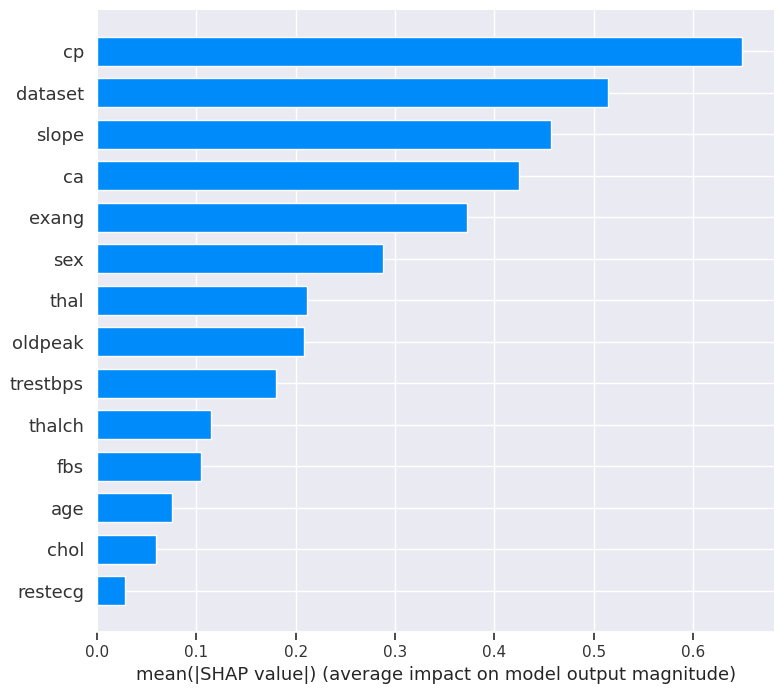

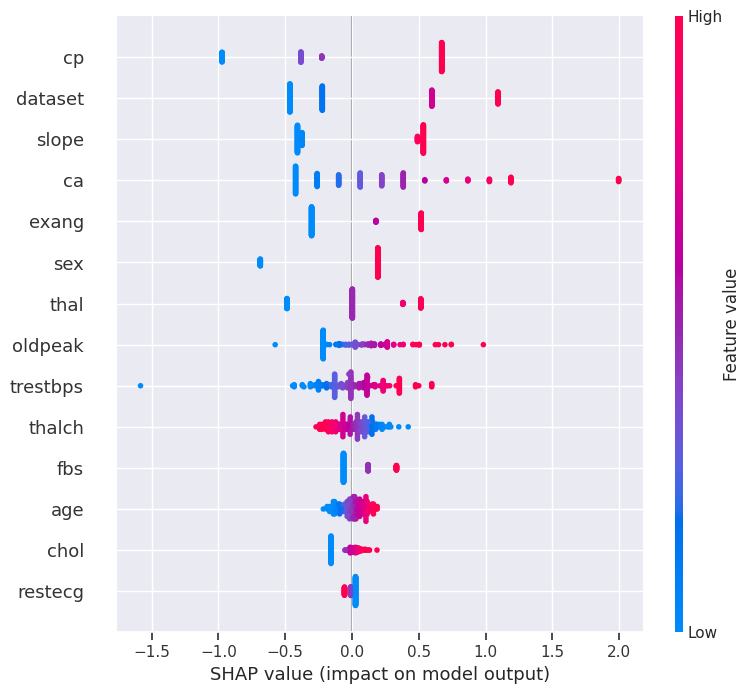

In [37]:
import shap

# Create a linear explainer for the logistic regression model
explainer = shap.LinearExplainer(best_model, X_train_transformed)
shap_values = explainer.shap_values(X_test_transformed)
shap.summary_plot(shap_values, X_test_transformed, feature_names=list(X.columns), plot_type="bar")
shap.summary_plot(shap_values, X_test_transformed, feature_names=list(X.columns), plot_type="dot")

The first plot allows us to see which features are more important for the predictions of our model. Features with longer bars have a greater impact on the model's output. This can be useful for better understanding how our model is making its predictions.

The results indicate that "cp" (chest pain), "dataset," and "slope" play an important role in determining the outcomes, while "restecg" has the least impact.

The second plot is designed to show the influence and effects of the most important variables for the model. Each data instance for which we extracted the SHAP values is represented by a single point on each variable. The X-axis is determined by the SHAP value of the variables, and the points "stack" along each variable row to show density. The color is used to show the original value of each variable (actual value, not SHAP value).

In a binary classification model, the SHAP values for the two classes are simply opposites of each other. This means that for a given feature and observation, the SHAP value for one class will be the opposite of the SHAP value for the other class. Therefore, no additional information is gained by displaying both values.



Next, let's pick out individual patients and see how the different variables are affecting their outcomes,

In [38]:
def heart_disease_risk_factors(model, patient):
    explainer = shap.LinearExplainer(model, X_test_transformed)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value, shap_values, patient)

data_for_prediction = X_test_transformed[1,:].astype(float)
data_for_prediction_df = pd.DataFrame(data_for_prediction.reshape(1, -1), columns=X_test.columns)
heart_disease_risk_factors(best_model, data_for_prediction_df)

In [39]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=be19d71196289d3ab67f8d4153e73706d9177e1f34dd3a46fb47f789c6f76c68
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [40]:
from lime.lime_tabular import LimeTabularExplainer

# Create a LIME explainer
lime_explainer = LimeTabularExplainer(X_train_transformed, feature_names=X_test.columns, class_names=['0', '1'])

# Explain an individual prediction
lime_exp = lime_explainer.explain_instance(X_test_transformed[100], best_model.predict_proba)
lime_exp.show_in_notebook(show_table=True, show_all=False)

---------------------------------------------------------------------------------------

**STREAMLIT APP**

In [41]:
from joblib import dump

dump(pipe, 'pipe.joblib')
dump(lr_grid_search.best_estimator_, 'model_1.joblib')


['model_1.joblib']